<a href="https://colab.research.google.com/github/pmortada/Amazon-Books/blob/main/Books_Amazon_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ways to read a (large) file

### Link to the document in google drive
https://drive.google.com/file/d/1ZlWF88HgT1onA60sOZ7f0V6za7WZuOY2/view?usp=sharing
dwn_url='https://drive.google.com/uc?id='
book_ratings = dwn_url+"1ZlWF88HgT1onA60sOZ7f0V6za7WZuOY2"
pd.read_csv(book_ratings)


https://drive.google.com/file/d/1OsFx5tb3-JXmj1f8LZJGJqLBDzkgSji_/view?usp=drive_link

dwn_url='https://drive.google.com/uc?id='
book_data = dwn_url+"1OsFx5tb3-JXmj1f8LZJGJqLBDzkgSji"

 How to get samples from a large file
n = 1000000 #number of records in file
s = 10000 #desired sample size
filename = ""/content/drive/MyDrive/books/Books_rating.csv""
skip = sorted(random.sample(range(n),n-s))
books_df = pd.read_csv(filename, skiprows=skip)



In [ ]:
'''
import random
n = 3000000 #number of records in file
s = 10000 #desired sample size
filename = "/content/drive/MyDrive/books/Books_rating.csv"
skip = sorted(random.sample(range(n),n-s))
books_df = pd.read_csv(filename, skiprows=skip, header = 0)
'''


'\nimport random\nn = 3000000 #number of records in file\ns = 10000 #desired sample size\nfilename = "/content/drive/MyDrive/books/Books_rating.csv"\nskip = sorted(random.sample(range(n),n-s))\nbooks_df = pd.read_csv(filename, skiprows=skip, header = 0)\n'

In [ ]:
#rec_cols = ['Title', 'User_id','review/score', 'review/text']

In [ ]:
#chunksize = 1000
#chunks = []


#book_ratings_chunk = pd.read_csv("/content/drive/MyDrive/books/Books_rating.csv", usecols=rec_cols, chunksize=chunksize,
                                      #dtype = {'review/score' : 'int16', 'Title': 'category','review/text':'category'})

#for chunk in book_ratings_chunk:
    # Rename columns
    #chunk.rename(columns={'Id': 'book_id', 'review/score': 'Rate', 'review/text': 'Review'}, inplace=True)

     # Replace NaN in 'User_id' with 'Unknown'
    #chunk['User_id'].fillna('Unknown', inplace=True)

     # Delete rows with NaN values
    #chunk.dropna(inplace=True)

    # Append the chunk to the list of chunks
    #chunks.append(chunk)

# Concatenate all chunks into a single DataFrame
#final_books_rating = pd.concat(chunks)

# Now you can see the info of the entire DataFrame
#final_books_rating.info(verbose=False, memory_usage='deep')

# Working with books data

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
books_data = pd.read_csv('/content/drive/MyDrive/books/books_data.csv')
books_data.head(2)


,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN


In [ ]:
books_data.shape


(212404, 10)

In [ ]:
nan_counts = books_data.isna().sum()
print(nan_counts)

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64


In [ ]:
books_data.dropna(subset=['description', 'categories'], inplace=True)

In [ ]:
books_data.shape

(137888, 10)

In [ ]:
duplicate_count = books_data.duplicated().sum()
print("Number of duplicate rows in the entire dataset:", duplicate_count)

Number of duplicate rows in the entire dataset: 0


In [ ]:
books_data.shape

(137888, 10)

In [ ]:
books_data.head(2)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN


In [ ]:
columns_to_drop = ['image', 'previewLink', 'publisher', 'infoLink', 'ratingsCount']
books_data.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
books_data.head()

,Title,description,authors,publishedDate,categories
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],2005-01-01,['Biography & Autobiography']
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],2000,['Religion']
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],2005-02,['Fiction']
5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],1996,['Religion']
8,Saint Hyacinth of Poland,The story for children 10 and up of St. Hyacin...,['Mary Fabyan Windeatt'],2009-01-01,['Biography & Autobiography']


In [ ]:
books_data.dropna(inplace=True)

In [ ]:
books_data.isnull().sum()

Title            0
description      0
authors          0
publishedDate    0
categories       0
dtype: int64

In [ ]:
books_data_all = books_data.to_csv('books_data_all.csv', index=False)

# books data to merge with books ratings

In [ ]:
books_data_all = pd.read_csv('/content/drive/MyDrive/books/books_data_all.csv')
books_data_all.head(2)

# Dropping the date to work with categories

In [ ]:
books_data_drop_date = books_data_all.copy()

In [ ]:
books_data_drop_date.drop(['publishedDate'], axis=1, inplace=True)

In [ ]:
books_data_drop_date.shape

In [ ]:
books_data_drop_date.head(2)

In [ ]:
books_data_drop_date = pd.DataFrame(books_data_drop_date)

In [ ]:
# Save the DataFrame to a CSV file
books_data_drop_date.to_csv('books_data_drop_date.csv', index = False)

# books_data_drop_date is still a DataFrame

# file to work with content base

books data drop date

# Working with top 10 classification

In [ ]:
books_data_drop_date = pd.read_csv('/content/books_data_drop_date.csv')
books_data_drop_date.head()

In [ ]:
books_top_10_cat = books_data_drop_date.copy()

In [ ]:
books_top_10_cat.head()

In [ ]:
books_top_10_cat['categories'].nunique()

In [ ]:
top_10_categories = books_top_10_cat['categories'].value_counts().head(10)
print(top_10_categories)

In [ ]:
top_10_categories.sum()

In [ ]:
category_counts = books_top_10_cat['categories'].value_counts()
top10_names = category_counts.head(10).index.tolist()
top10_data = books_top_10_cat[books_top_10_cat['categories'].isin(top10_names)].copy()

top10_data.shape

In [ ]:
top10_data

In [ ]:
# Find rows where 'description' is empty or contains only symbols
symbol_rows = top10_data[top10_data['description'].str.contains(r'^\W*$')]

# Print 'description' for these rows
for index, row in symbol_rows.iterrows():
    print(f"Index: {index}, Description: {row['description']}")

In [ ]:
top10_data.drop(top10_data[top10_data.description.str.contains(r'^\W*$')].index, inplace=True)

In [ ]:
top10_data

# Create a csv for top10_data to use in the content base reccomender

In [ ]:
type(top10_data)

In [ ]:
top10_data.to_csv('top10_data.csv', index= False)

# Calculate the 500 observations from each category

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Randomly sample 500 observations from each category
np.random.seed(42)
top10_cat = top10_data.groupby('categories').apply(lambda x: x.sample(n=500)).reset_index(drop=True)
top10_cat.shape


In [ ]:
top10_cat.head()

In [ ]:
top10_cat = pd.read_csv('top10_cat.csv', index = False)

# Content Based

Content Based RS => Keep 2,000 reviews per category. 20.000 reviews. (if is still too much, do less per category)

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
top10_data = pd.read_csv('/content/drive/MyDrive/books/top10_data.csv')

In [ ]:
top10_data.head()

,Title,description,authors,categories
0,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],['Biography & Autobiography']
1,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],['Religion']
2,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],['Fiction']
3,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],['Religion']
4,Saint Hyacinth of Poland,The story for children 10 and up of St. Hyacin...,['Mary Fabyan Windeatt'],['Biography & Autobiography']


In [ ]:
top10_data['categories'].value_counts()

In [ ]:
category_counts = top10_data['categories'].value_counts()



In [ ]:
import matplotlib.pyplot as plt

# Create a list of colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FF5733', '#DAF7A6', '#C70039']

# Create the horizontal bar plot
category_counts.plot(kind='barh', color=colors)
plt.title('Top 10 Categories', color='blue')
plt.xlabel('User Count', color='blue')
plt.ylabel('Category', color='blue')
plt.gca().invert_yaxis()  # Invert y-axis to have the category with the highest count at the top

# Change the color of the tick labels
plt.tick_params(colors='black')

plt.show()

In [ ]:
top10_data.shape

In [ ]:
top10_data.isnull().sum()

In [ ]:
# Find duplicates in the 'title' column
duplicates_t = top10_data.duplicated(subset='Title', keep=False)

# Print the number of duplicate books
print(duplicates_t.sum())

In [ ]:
# Find rows where 'description' is empty or contains only symbols
symbol_rows = top10_data[top10_data['description'].str.contains(r'^\W*$')]

# Print 'description' for these rows
for index, row in symbol_rows.iterrows():
    print(f"Index: {index}, Description: {row['description']}")
else:
    print('No empty space or symbols in the description column')

In [ ]:
data_cat_2000 = top10_data.groupby('categories').apply(lambda x: x.sample(min(len(x), 2300), random_state= 42))
# Reset the index
data_cat_2000 = data_cat_2000.reset_index(drop=True)

# Create 'book_id' column from the index
data_cat_2000['book_id'] = data_cat_2000.index + 1

# Specify the new column order
cols = ['book_id'] + [col for col in data_cat_2000 if col != 'book_id']

# Reorder the columns
data_cat_2000 = data_cat_2000[cols]

data_cat_2000.rename(columns={'Title': 'title'}, inplace=True)

In [ ]:
data_cat_2000.head(2)

In [ ]:
data_cat_2000['categories'].value_counts()

In [ ]:
data_cat_2000.to_csv('data_cat_2000.csv', index=False)

# Preprocessing

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_cat_2000 = pd.read_csv('/content/drive/MyDrive/books/data_cat_2000.csv')

In [ ]:
data_cat_2000.head(2)

,book_id,title,description,authors,categories
0,1,San Francisco Beat: Talking with the Poets,Essential interviews with makers of the San Fr...,['David Meltzer'],['Biography & Autobiography']
1,2,The alligator's life history (Society for the ...,Based on his more than 40 years of field resea...,['D. Bruce Means'],['Biography & Autobiography']


In [ ]:
!pip install rake_nltk

In [ ]:
import numpy as np
import pandas as pd

#from ast import literal_eval # This evaluates whether an expresion is a Python datatype or not /Lists and Dictionaries
from rake_nltk import Rake

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 40)

import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Find a specific book title
book_title = 'The Hobbit'
book_data = data_cat_2000.loc[data_cat_2000['title'] == book_title]

# Print the book data
print(book_data)

       book_id       title                                        description  \
13495    13496  The Hobbit  Celebrating 75 years of one of the world's mos...   

                    authors            categories  
13495  ['J. R. R. Tolkien']  ['Juvenile Fiction']  


In [ ]:
data_cat_2000['authors'].value_counts()

authors
['Carolyn Keene']                       21
['DK']                                  16
['Ann M. Martin']                       16
['Tom Tierney']                         15
['Jamie Suzanne', 'Francine Pascal']    15
                                        ..
['Gordon R. Dickson']                    1
['Madeline Baker']                       1
['Paul Black']                           1
['Ikish Mullens']                        1
['Irit Rogoff']                          1
Name: count, Length: 19967, dtype: int64

In [ ]:
'''
import matplotlib.pyplot as plt

# Count the number of books per author
top_authors = data_cat_2000['authors'].value_counts().head(10)

# Plot
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FF5733', '#DAF7A6', '#C70039']
top_authors.plot(kind='barh', color=colors, title='Top Authors by Book Count')
plt.xlabel('Book Count', color='blue')
plt.ylabel('Author', color='blue')
plt.gca().invert_yaxis()  # Invert y-axis to have the author with the highest count at the top
plt.title('Top Authors by Book Count', color='blue')


# Change the color of the tick labels
plt.tick_params(colors='blue')

plt.show()
'''

# Convert all columns into lower case

In [ ]:
data_cat_2000.columns

Index(['book_id', 'title', 'description', 'authors', 'categories'], dtype='object')

In [ ]:
def clean_text(text):
    if type(text) == str:
        text = text.strip().lower()
    return text

data_cat_2000 = data_cat_2000.applymap(clean_text)


In [ ]:
data_cat_2000.head()

,book_id,title,description,authors,categories
0,1,san francisco beat: talking with the poets,essential interviews with makers of the san fr...,['david meltzer'],['biography & autobiography']
1,2,the alligator's life history (society for the ...,based on his more than 40 years of field resea...,['d. bruce means'],['biography & autobiography']
2,3,dusty,dusty springfield led a tragic yet inspiring l...,"['penny valentine', 'vicki wickham']",['biography & autobiography']
3,4,jun q'anil: one who walks the way,"professional los angeles psychotherapist, jess...",['jessica nagler'],['biography & autobiography']
4,5,walking with the wind: a memoir of the movement,"the award-winning national bestseller, walking...","[""michael d'orso"", 'john lewis']",['biography & autobiography']


In [ ]:
data_cat_2000_clean = data_cat_2000.copy()

# Combine authors into 1 word to use for text extraction

In [ ]:
import pandas as pd

In [ ]:
data_cat_2000_clean = pd.read_csv('/content/drive/MyDrive/books/data_cat_2000_clean.csv')

In [ ]:
for index, row in data_cat_2000_clean.iterrows():
    data_cat_2000_clean.at[index, 'authors'] = ''.join(row['authors']).replace(' ', '')

data_cat_2000_clean.head()

,book_id,title,description,authors,categories
0,1,san francisco beat: talking with the poets,essential interviews with makers of the san fr...,['davidmeltzer'],['biography & autobiography']
1,2,the alligator's life history (society for the ...,based on his more than 40 years of field resea...,['d.brucemeans'],['biography & autobiography']
2,3,dusty,dusty springfield led a tragic yet inspiring l...,"['pennyvalentine','vickiwickham']",['biography & autobiography']
3,4,jun q'anil: one who walks the way,"professional los angeles psychotherapist, jess...",['jessicanagler'],['biography & autobiography']
4,5,walking with the wind: a memoir of the movement,"the award-winning national bestseller, walking...","[""michaeld'orso"",'johnlewis']",['biography & autobiography']


# Extracts keywords from description

In [ ]:
!pip install rake_nltk

In [ ]:
import numpy as np
import pandas as pd

#from ast import literal_eval # This evaluates whether an expresion is a Python datatype or not /Lists and Dictionaries
from rake_nltk import Rake

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 40)

import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Add a 'keywords' column to movies_sample_df
data_cat_2000_clean['keywords'] = None

# Loop across all rows to extract all keywords from description
for index, row in data_cat_2000_clean.iterrows():
    description = row['description']

    # instantiating Rake, by default it uses English stopwords from NLTK and discards all punctuation chars
    r = Rake()

    # extract words by passing the text
    r.extract_keywords_from_text(description)

    # get the dictionary with key words and their scores
    keyword_dict_scores = r.get_word_degrees()

    # assign keywords to new columns
    data_cat_2000_clean.at[index, 'keywords'] = list(keyword_dict_scores.keys())

In [ ]:
data_cat_2000_clean[["description", "keywords"]].tail(10)

,description,keywords
22990,this investigation into modern disasters in th...,"[investigation, modern, disasters, soviet, uni..."
22991,various articles are presented covering psycho...,"[various, articles, presented, covering, psych..."
22992,documents the great diversity in how people pe...,"[documents, great, diversity, people, perceive..."
22993,a thorough analysis of the religious and ethni...,"[thorough, analysis, religious, ethnic, identi..."
22994,the author recounts how she gradually lost her...,"[author, recounts, gradually, lost, sight, ret..."
22995,drawing from her interviews in forty-five home...,"[drawing, interviews, forty, five, homes, one,..."
22996,a stunning new collection of images and icons ...,"[stunning, new, collection, images, icons, pri..."
22997,why are some people more likely than others to...,"[people, likely, others, become, addicted, dru..."
22998,political scientists and social choice theoris...,"[political, scientists, social, choice, theori..."
22999,"how have issues of place and identity, of belo...","[issues, place, identity, belonging, exclusion..."


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Convert 'keywords' column to strings and remove single quotes
data_cat_2000_clean['keywords'] = data_cat_2000_clean['keywords'].astype(str).str.replace("'", "")

# Combine all keywords into one big text
text = ' '.join(data_cat_2000_clean['keywords'])

# Define your own list of stop words
my_stopwords = set(STOPWORDS)
my_stopwords.update(["book '", " ' ", 'book', 'author', 'one', 'many', 'much', 'new', 'way', 'u', 'well', 'reader', 'two', 'including'])

# Create and generate a word cloud image
# Use the 'colormap' parameter to change the color
wordcloud = WordCloud(stopwords=my_stopwords, max_words=200, background_color='white', colormap='plasma').generate(text)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Drop rows with empty 'keywords' column
data_cat_2000_clean = data_cat_2000_clean[data_cat_2000_clean['keywords'].str.len() != 0]

In [ ]:
data_cat_2000_clean.shape

(23000, 6)

In [ ]:
data_cat_2000_clean.drop("description", axis=1, inplace=True)

In [ ]:
data_cat_2000_clean.head(2)

,book_id,title,authors,categories,keywords
0,1,san francisco beat: talking with the poets,['davidmeltzer'],['biography & autobiography'],"[essential, interviews, makers, san, francisco..."
1,2,the alligator's life history (society for the ...,['d.brucemeans'],['biography & autobiography'],"[based, 40, years, field, research, means, exp..."


In [ ]:
# Reset index after dropping rows
data_cat_2000_clean.reset_index(drop=True, inplace=True)

In [ ]:
data_cat_2000_clean.head()

,book_id,title,authors,categories,keywords
0,1,san francisco beat: talking with the poets,['davidmeltzer'],['biography & autobiography'],"[essential, interviews, makers, san, francisco..."
1,2,the alligator's life history (society for the ...,['d.brucemeans'],['biography & autobiography'],"[based, 40, years, field, research, means, exp..."
2,3,dusty,"['pennyvalentine','vickiwickham']",['biography & autobiography'],"[dusty, springfield, led, tragic, yet, inspiri..."
3,4,jun q'anil: one who walks the way,['jessicanagler'],['biography & autobiography'],"[professional, los, angeles, psychotherapist, ..."
4,5,walking with the wind: a memoir of the movement,"[""michaeld'orso"",'johnlewis']",['biography & autobiography'],"[award, winning, national, bestseller, walking..."


# Bag of words creation
Each book_id will be represented by all the tokens in the columns as an unique string to create a vector


**i.e. :1	the book_id 1: aristocrats	['stellatillyard']	['biography & autobiography']	[fascinating, insight, 18th, century, aristocr.]**

In [ ]:
# Bag-Of-Words list
columns = [col for col in data_cat_2000_clean.columns if col != 'book_id']
data_cat_2000_clean['bow'] = ''

for index, row in data_cat_2000_clean.iterrows():
    words = ''

    for col in columns:
        # Check if the column value is a list
        if isinstance(row[col], list):
            words += ' '.join(row[col]) + ' '
        else:
            words += str(row[col]) + ' '

    data_cat_2000_clean.at[index, 'bow'] = words

In [ ]:
data_cat_2000_clean.head()

,book_id,title,authors,categories,keywords,bow
0,1,san francisco beat: talking with the poets,['davidmeltzer'],['biography & autobiography'],"[essential, interviews, makers, san, francisco...",san francisco beat: talking with the poets ['d...
1,2,the alligator's life history (society for the ...,['d.brucemeans'],['biography & autobiography'],"[based, 40, years, field, research, means, exp...",the alligator's life history (society for the ...
2,3,dusty,"['pennyvalentine','vickiwickham']",['biography & autobiography'],"[dusty, springfield, led, tragic, yet, inspiri...","dusty ['pennyvalentine','vickiwickham'] ['biog..."
3,4,jun q'anil: one who walks the way,['jessicanagler'],['biography & autobiography'],"[professional, los, angeles, psychotherapist, ...",jun q'anil: one who walks the way ['jessicanag...
4,5,walking with the wind: a memoir of the movement,"[""michaeld'orso"",'johnlewis']",['biography & autobiography'],"[award, winning, national, bestseller, walking...",walking with the wind: a memoir of the movemen...


In [ ]:
data_cat_2000_clean.shape

(23000, 6)

### Count Vectorizer

Convert a collection of text documents to a matrix of token counts. It's a data table that is obtained after normalization of next-generation sequencing data.

#### Things to do:

- Instantiate & Fit CountVectorizer into 'bow' -> to create count_matrix this is useful for cosine similarity
- 'title' column is an Index as we saw above, hence we convert 'title' column as Series -> to use 'title' as an ordered numerical list
- Understand the count_matrix -> Check its shape and type
- Convert sparse count_matrix to dense vector -> To reduce complexity, For more info -> Sparse Matrices
- Dense matrix for a sample row
- Check all words in the vocabulary
- Generate cosine similarity for count_matrix

Gives the vocabulary space

In [ ]:
#instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(data_cat_2000_clean['bow'])

In [ ]:
#Shape count_matrix
count_matrix.shape

(23000, 101319)

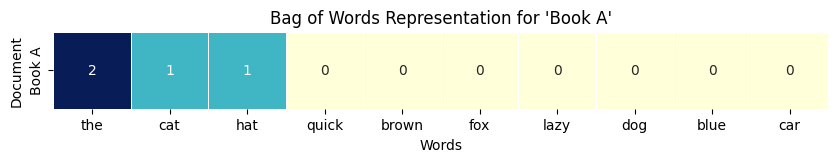

In [ ]:
'''
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame with Bag of Words representations
data = {
    'user_id': [1, 2, 3, 4],
    'title': ['Book A', 'Book B', 'Book C', 'Book D'],
    'bow': [
        {'the': 2, 'cat': 1, 'hat': 1},
        {'the': 1, 'quick': 1, 'brown': 1, 'fox': 1},
        {'the': 1, 'lazy': 1, 'dog': 1},
        {'the': 1, 'quick': 1, 'blue': 1, 'car': 1}
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Create a DataFrame from the BoW column
bow_df = pd.DataFrame(df['bow'].tolist()).fillna(0).astype(int)

# Add titles as index for better readability
bow_df.index = df['title']

# Visualize the BoW representation for a single example
example_index = 0  # Index of the example document to visualize
example_bow = bow_df.iloc[example_index:example_index+1]

# Plotting the heatmap for the example BoW
plt.figure(figsize=(10, 1))
sns.heatmap(example_bow, annot=True, cmap="YlGnBu", cbar=False, linewidths=.5)
plt.title(f"Bag of Words Representation for '{df['title'][example_index]}'")
plt.xlabel('Words')
plt.ylabel('Document')
plt.show()
'''



In [ ]:
# Find a specific book title
book_title = 'the hobbit'
book_data = data_cat_2000_clean.loc[data_cat_2000_clean['title'] == book_title]

# Print the book data
print(book_data)

       book_id       title            authors            categories  \
13495    13496  the hobbit  ['j.r.r.tolkien']  ['juvenile fiction']   

                                                keywords  \
13495  [celebrating, 75, years, one, world, treasured...   

                                                     bow  
13495  the hobbit ['j.r.r.tolkien'] ['juvenile fictio...  


# Cosine similarity
Compare all the vectors (products) among each other to find the similarity between them.

In [ ]:
data_cat_2000_clean.head()

,book_id,title,authors,categories,keywords,bow
0,1,san francisco beat: talking with the poets,['davidmeltzer'],['biography & autobiography'],"[essential, interviews, makers, san, francisco...",san francisco beat: talking with the poets ['d...
1,2,the alligator's life history (society for the ...,['d.brucemeans'],['biography & autobiography'],"[based, 40, years, field, research, means, exp...",the alligator's life history (society for the ...
2,3,dusty,"['pennyvalentine','vickiwickham']",['biography & autobiography'],"[dusty, springfield, led, tragic, yet, inspiri...","dusty ['pennyvalentine','vickiwickham'] ['biog..."
3,4,jun q'anil: one who walks the way,['jessicanagler'],['biography & autobiography'],"[professional, los, angeles, psychotherapist, ...",jun q'anil: one who walks the way ['jessicanag...
4,5,walking with the wind: a memoir of the movement,"[""michaeld'orso"",'johnlewis']",['biography & autobiography'],"[award, winning, national, bestseller, walking...",walking with the wind: a memoir of the movemen...


In [ ]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)

cosine_sim

array([[1.        , 0.09622504, 0.0797241 , ..., 0.        , 0.02727724,
        0.        ],
       [0.09622504, 1.        , 0.04602873, ..., 0.01547461, 0.04724556,
        0.02116669],
       [0.0797241 , 0.04602873, 1.        , ..., 0.01709464, 0.        ,
        0.        ],
       ...,
       [0.        , 0.01547461, 0.01709464, ..., 1.        , 0.0877328 ,
        0.04716666],
       [0.02727724, 0.04724556, 0.        , ..., 0.0877328 , 1.        ,
        0.0720023 ],
       [0.        , 0.02116669, 0.        , ..., 0.04716666, 0.0720023 ,
        1.        ]])

# Recommend top n books given a book name

In [ ]:
# Find a specific book title
book_title = 'the hobbit'
book_data = data_cat_2000_clean.loc[data_cat_2000_clean['title'] == book_title]

# Print the book data
print(book_data)

       book_id       title            authors            categories  \
13495    13496  the hobbit  ['j.r.r.tolkien']  ['juvenile fiction']   

                                                keywords  \
13495  [celebrating, 75, years, one, world, treasured...   

                                                     bow  
13495  the hobbit ['j.r.r.tolkien'] ['juvenile fictio...  


In [ ]:
data_cat_2000_clean.head(2)

,book_id,title,authors,categories,keywords,bow
0,1,san francisco beat: talking with the poets,['davidmeltzer'],['biography & autobiography'],"[essential, interviews, makers, san, francisco...",san francisco beat: talking with the poets ['d...
1,2,the alligator's life history (society for the ...,['d.brucemeans'],['biography & autobiography'],"[based, 40, years, field, research, means, exp...",the alligator's life history (society for the ...


In [ ]:
# Create a Series with book titles
titles = pd.Series(data_cat_2000_clean['title'].values, index=data_cat_2000_clean['book_id'])

# Display the first 10 titles
titles.head(5)

book_id
1           san francisco beat: talking with the poets
2    the alligator's life history (society for the ...
3                                                dusty
4                    jun q'anil: one who walks the way
5      walking with the wind: a memoir of the movement
dtype: object

In [ ]:
#pd.Series(cosine_sim[10]).sort_values(ascending=False)[1:5+1]

214      0.306186
914      0.280056
1995     0.272772
253      0.270501
13021    0.264135
dtype: float64

In [ ]:
# Get the title of the movie at index 13495
title = data_cat_2000_clean.loc[13495, 'title']
print(title)

the hobbit


In [ ]:
data_cat_2000_clean.loc[13495]

book_id                                                   13496
title                                                the hobbit
authors                                       ['j.r.r.tolkien']
categories                                 ['juvenile fiction']
keywords      [celebrating, 75, years, one, world, treasured...
bow           the hobbit ['j.r.r.tolkien'] ['juvenile fictio...
Name: 13495, dtype: object

In [ ]:
'''
# Get a list of the first 50 book titles
titles = data_cat_2000_clean['title'].head(50).tolist()

# Print the list of titles
for title in titles:
    print(title)
    '''

san francisco beat: talking with the poets
the alligator's life history (society for the study of amphibians and reptiles. miscellaneous publications : facsimile reprints in herpetology)
dusty
jun q'anil: one who walks the way
walking with the wind: a memoir of the movement
the forger
south;: the story of shackleton's 1914-1917 expedition
a question of leadership: paul keating : political fighter
defending the spirit: a black life in america
abba: the name of the game
each one believing: paul mccartney; on stage, off stage, and backstage
nicole kidman: the biography
little new york bastard: a memoir
the adventures of the woman homesteader: the life and letters of elinore pruitt stewart (women in the west)
one hundred centuries of solitude redire
croatian tales of long ago, volume 1 (english, croatian and german edition)
on fire.
pursuit of freedom: a true story of the enduring power of hope & dreams
open secrets: a spiritual journey through a country church
confessions of an original s

In [ ]:
data_cat_2000_clean.title

0               san francisco beat: talking with the poets
1        the alligator's life history (society for the ...
2                                                    dusty
3                        jun q'anil: one who walks the way
4          walking with the wind: a memoir of the movement
                               ...                        
22995                                  the art of adoption
22996            women in control: iron fist, velvet glove
22997                  drug abuse: origins & interventions
22998                                      behind the mule
22999            terra infirma: geography's visual culture
Name: title, Length: 23000, dtype: object

# The Hobbit

In [ ]:
#books that are similar to the hobbit
pd.Series(cosine_sim[13495]).sort_values(ascending = False)

13495    1.000000
6999     0.291920
13333    0.291920
1078     0.278019
8259     0.252861
           ...   
9768     0.000000
6753     0.000000
20462    0.000000
20464    0.000000
748      0.000000
Length: 23000, dtype: float64

In [ ]:
#vector of the The Hobitt
cosine_sim[13495]

array([0.08512565, 0.1228683 , 0.05429253, ..., 0.        , 0.05572782,
       0.03745029])

In [ ]:
'''
# Find a specific book title
book_title = "charlotte's web"
book_data = data_cat_2000_clean.loc[data_cat_2000_clean['title'] == book_title]

# Print the book data
print(book_data)
'''

Empty DataFrame
Columns: [book_id, title, authors, categories, keywords, bow]
Index: []


In [ ]:
# Create a Series that maps book id to titles
indices = pd.Series(data_cat_2000_clean.title, index=data_cat_2000_clean.book_id)

def recommendations(title, n=5, cosine_sim=cosine_sim):
    recommended_books = []

    # Get the index of the book that matches the title
    idx = indices[indices == title].index[0]

    # Find the highest cosine similarity scores for this title
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending=False)

    # Get the indexes of the 'n' most similar books
    top_n_indexes = list(score_series.iloc[1:n+1].index)

    # Populate the list with titles of the 'n' most similar books
    for i in top_n_indexes:
        recommended_books.append(data_cat_2000_clean.title[i])

    return recommended_books

In [ ]:
'''
# Recommendations for users that liked "terra infirma: geography's visual culture"
book = "terra infirma: geography's visual culture"
n = 10

recommendations(book, n)
'''

['re-inventing africa: matriarchy, religion and culture',
 'cultural theory and popular culture: a reader',
 'culture and customs of nigeria',
 'culture and customs of kenya (culture and customs of africa)',
 'mechanic accents: dime novels and working class culture in america (haymarket)',
 'twentieth-century teen culture by the decades: a reference guide',
 'visual faith: art, theology, and worship in dialogue (engaging culture)',
 'knowledge for what?: the place of social science in american culture',
 'essays from contemporary culture',
 'gay roots: twenty years of gay sunshine: an anthology of gay history, sex, politics, and culture (vol 1)']

In [ ]:
# Recommendations for users that liked "the hobbit"
book = "the hobbit"
n = 10

recommendations(book, n)

['beyond the sea of ice: the first americans, book 1',
 'jackalope',
 'tales from the art crypt: the painters, the museums, the curators, the collectors, the auctions, the art',
 'the mummy returns',
 'the interpreter',
 'one incredible moment celebrating the majesty of the manger',
 'on the banks of the bayou (turtleback school & library binding edition) (little house chapter books: the rose years)',
 'the wizard, the fairy, and the magic chicken',
 'the saxon shore (the camulod chronicles, book 4)',
 "let's eat: what children eat around the world"]

In [ ]:
#books that are similar to the hobbit
pd.Series(cosine_sim[13495]).sort_values(ascending = False)

13495    1.000000
6999     0.291920
13333    0.291920
1078     0.278019
8259     0.252861
           ...   
9768     0.000000
6753     0.000000
20462    0.000000
20464    0.000000
748      0.000000
Length: 23000, dtype: float64

In [ ]:
print(data_cat_2000_clean.title[13495])
print(data_cat_2000_clean.title[6999])
print(data_cat_2000_clean.title[13333])
print(data_cat_2000_clean.title[1078])

the hobbit
beyond the sea of ice: the first americans, book 1
jackalope
tales from the art crypt: the painters, the museums, the curators, the collectors, the auctions, the art


# Tests

In [ ]:
'''
# Replace 'author_name' with the name of the specific author you're interested in
author_name = 'j.r.r.tolkien'
num_books = data_cat_2000_clean[data_cat_2000_clean['authors'].str.contains(author_name, na=False)].shape[0]

print(f"The author {author_name} has {num_books} books.")
'''

The author j.r.r.tolkien has 6 books.


In [ ]:
'''
# Find a specific book title
book_title = "the fellowship of the ring"
book_data = data_cat_2000_clean.loc[data_cat_2000_clean['title'] == book_title]

# Print the book data
print(book_data)
'''

      book_id                       title            authors   categories  \
7629     7630  the fellowship of the ring  ['j.r.r.tolkien']  ['fiction']   

                                               keywords  \
7629  [begin, journey, middle, earth, ..., inspirati...   

                                                    bow  
7629  the fellowship of the ring ['j.r.r.tolkien'] [...  


In [ ]:
'''
# Replace 'author_name' with the name of the specific author you're interested in
author_name = 'j.r.r.tolkien'
books_by_author = data_cat_2000_clean[data_cat_2000_clean['authors'].str.contains(author_name, case=False, regex=False)]['title']

print(books_by_author)
'''

1523                              letters of j r r tolkien
7629                            the fellowship of the ring
8434     elias: un hombre de heroismo y humildad = elij...
8670     choosers of the slain (paladin of shadows, boo...
13099                bilbo's last song: at the grey havens
13495                                           the hobbit
Name: title, dtype: object


In [ ]:
'''
#top_ten_authors = data_cat_2000_clean['authors'].value_counts().nlargest(10)
#print(top_ten_authors)
'''

authors
['r.l.stine']                         23
['carolynkeene']                      21
['dk']                                16
['annm.martin']                       16
['jamiesuzanne','francinepascal']     15
['tomtierney']                        15
['franklinw.dixon']                   14
['haroldbloom']                       14
['maxlucado']                         12
['stanberenstain','janberenstain']    11
Name: count, dtype: int64


In [ ]:
'''
# Replace 'author_name' with the name of the specific author you're interested in
author_name = 'r.l.stine'
num_books = data_cat_2000_clean[data_cat_2000_clean['authors'].str.contains(author_name, na=False)].shape[0]

print(f"The author {author_name} has {num_books} books.")
'''

'\n# Replace \'author_name\' with the name of the specific author you\'re interested in\nauthor_name = \'r.l.stine\'\nnum_books = data_cat_2000_clean[data_cat_2000_clean[\'authors\'].str.contains(author_name, na=False)].shape[0]\n\nprint(f"The author {author_name} has {num_books} books.")\n'

# nicole kidman


In [ ]:
# Find a specific book title
book_title = 'nicole kidman: the biography'
book_data = data_cat_2000_clean.loc[data_cat_2000_clean['title'] == book_title]

# Print the book data
print(book_data)

    book_id                         title                           authors  \
11       12  nicole kidman: the biography  ['lucyellis','bryonysutherland']   

                       categories  \
11  ['biography & autobiography']   

                                             keywords  \
11  [biography, nicole, kidman, tracing, rise, chi...   

                                                  bow  
11  nicole kidman: the biography ['lucyellis','bry...  


In [ ]:
# Recommendations for users that liked "nicole kidman: the biography"
movie = 'nicole kidman: the biography'
n = 10

recommendations(movie, n)

['nicole kidman',
 'nelson the admiral',
 'the glass house;: the life of theodore roethke',
 'crazy horse, the strange man of the oglalas;: a biography',
 'the life of mozart (musical lives)',
 'the life of emily dickinson',
 "the lives of danielle steel: the unauthorized biography of america's #1 best-selling author",
 'dylan: a biography',
 'edge of midnight: the life of john schlesinger: the authorised biography',
 'drew barrymore: the biography']

In [ ]:
#books that are similar to nicoel
pd.Series(cosine_sim[11]).sort_values(ascending = False).head(10)

11      1.000000
242     0.976187
716     0.350823
1109    0.345033
422     0.325000
1670    0.322749
1212    0.318198
2197    0.309965
1511    0.306970
294     0.306413
dtype: float64

In [ ]:
# Replace 'index' with the index of the book you're interested in
index = 242
book = data_cat_2000_clean.loc[index, 'title']

print(book)

In [ ]:
print(data_cat_2000_clean.title[13495])
print(data_cat_2000_clean.title[6999])
print(data_cat_2000_clean.title[13333])

In [ ]:
book = input("Please enter a book name: ")
n = 10

recommendations(book, n)

Please enter a book name: beyond the sea of ice: the first americans, book 1


['the rule of the templars: the french text of the rule of the order of the knights templar (studies in the history of medieval religion)',
 "the cruise of the sea eagle: the amazing true story of imperial germany's gentleman pirate",
 'mark of the cat: year of the rat',
 'r is for rocket: the end of the beginning; the fog horn; the rocket; the golden apples of the sun; a sound of thunder; the long rain; the exiles; here there be tygers; the strawberry window; the dragon; the gift; frost and fire; uncle einar',
 'the mystery of the flying express (hardy boys, book 20)',
 'beyond the biography of jesus: the journey of quadratos, book i',
 'the atlantic division: the boston celtics, the miami heat, the new jersey nets, the new york knicks, the orlando magic, the philadelphia 76er (above the rim)',
 'a trilogy: the singer, the song and the finale (boxed set of 3): a mythic retelling of the story of the new testament',
 'popol vuh: the definitive edition of the mayan book of the dawn of li

In [ ]:
# Find a specific book title
book_title = 'beyond the sea of ice: the first americans, book 1'
book_data = data_cat_2000_clean.loc[data_cat_2000_clean['title'] == book_title]

# Print the book data
print(book_data)

      book_id                                              title  \
6999     7000  beyond the sea of ice: the first americans, bo...   

                   authors   categories  \
6999  ['williamsarabande']  ['fiction']   

                                               keywords  \
6999  [humans, first, walked, world, learn, live, ex...   

                                                    bow  
6999  beyond the sea of ice: the first americans, bo...  


In [ ]:
#books that are similar to
pd.Series(cosine_sim[6999]).sort_values(ascending = False).head(10)

6999     1.000000
10241    0.365655
1288     0.361814
7185     0.361478
1845     0.358979
13344    0.356887
16309    0.353861
14302    0.353009
7690     0.347089
10655    0.343452
dtype: float64

# Threshold

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming you have a matrix 'X' representing your items
cosine_sim = cosine_similarity(count_matrix, count_matrix)


# Set a threshold
threshold = 0.8

# Apply the threshold
similar_pairs = np.where(cosine_sim > threshold)

# Print the indices of similar pairs
for i in range(len(similar_pairs[0])):
    print(f"Item {similar_pairs[0][i]} is similar to item {similar_pairs[1][i]}")

# Working with books_rating

**I had to get a sample of 500000 in order to get a merged dataframe of around 9000 rows to calculate the Colaborative filtering**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
books_rating = pd.read_csv("/content/drive/MyDrive/books/Books_rating.csv", usecols= ['Id', 'Title', 'User_id', 'review/score']).sample(n=1000000, random_state=42)
books_rating

,Id,Title,User_id,review/score
2945667,B0006CR6U4,"A dictionary of the Targumim, the Talmud Babli...",A303XPDO694V6X,4.0
2352586,0897166159,Espresso Coffee: Professional Techniques,A3780H4TM9RMB8,2.0
1531260,0736693408,The First King of Shannara (The Sword of Shann...,A1AX6VPDQQZDPV,5.0
941910,0395051029,Wuthering Heights (Riverside editions),A35RQKCCCQ62O0,4.0
2582125,4770016050,"A Cat, a Man, and Two Women (Japans Modern Wri...",A2IJQDE1I4SIJT,5.0
...,...,...,...,...
2327413,0787100633,Tarzan of the Apes,NaN,4.0
2727734,B0009RJVFY,Kids Are Worth It!: Giving Your Child the Gift...,A154NZE28WL6OE,5.0
2942910,B000H9R1Q0,The Hobbit,A2NIKD45C0K2LM,5.0
1078930,1841762970,Kolin 1757: Frederick the Great's First Defeat...,A3GGHM4V1L675S,4.0


In [ ]:
books_rating.isnull().sum()


Id                   0
Title               70
User_id         187017
review/score         0
dtype: int64

In [ ]:
books_rating.dropna(inplace = True)

In [ ]:
books_rating.shape

(812920, 4)

In [ ]:
books_rating.rename(columns = {'Id': 'Book_id', 'review/score': 'Rate'}, inplace=True)

In [ ]:
books_rating.head(2)

,Book_id,Title,User_id,Rate
2945667,B0006CR6U4,"A dictionary of the Targumim, the Talmud Babli...",A303XPDO694V6X,4.0
2352586,0897166159,Espresso Coffee: Professional Techniques,A3780H4TM9RMB8,2.0


In [ ]:
books_rating_final = books_rating.drop_duplicates()

In [ ]:
books_rating_final.shape

(807614, 4)

In [ ]:
books_rating_final.reset_index(drop=True)

,Book_id,Title,User_id,Rate
0,B0006CR6U4,"A dictionary of the Targumim, the Talmud Babli...",A303XPDO694V6X,4.0
1,0897166159,Espresso Coffee: Professional Techniques,A3780H4TM9RMB8,2.0
2,0736693408,The First King of Shannara (The Sword of Shann...,A1AX6VPDQQZDPV,5.0
3,0395051029,Wuthering Heights (Riverside editions),A35RQKCCCQ62O0,4.0
4,4770016050,"A Cat, a Man, and Two Women (Japans Modern Wri...",A2IJQDE1I4SIJT,5.0
...,...,...,...,...
807609,1560251751,Running Wild: An Extraordinary Adventure from ...,A2WD81D996P7Y,4.0
807610,B000OTZBD8,A Whale for the Killing,A30AO422P01XK0,4.0
807611,B0009RJVFY,Kids Are Worth It!: Giving Your Child the Gift...,A154NZE28WL6OE,5.0
807612,B000H9R1Q0,The Hobbit,A2NIKD45C0K2LM,5.0


In [ ]:
books_rating_final= pd.DataFrame(books_rating_final)
books_rating_final.to_csv('books_rating_final.csv', index=False)

# Merge both dataframes

In [ ]:
import pandas as pd

In [ ]:
books_data_all = pd.read_csv('/content/books_data_all.csv')

In [ ]:
books_rating_final = pd.read_csv('/content/books_rating_final.csv')

In [ ]:
merged_data_all = books_data_all.merge(books_rating_final, on='Title', how='inner')
merged_data_all.head()

,Title,description,authors,publishedDate,categories,Book_id,User_id,Rate
0,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],2005-01-01,['Biography & Autobiography'],0826414346,A2F6NONFUDB6UK,4.0
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],2005-01-01,['Biography & Autobiography'],0826414346,A3VA4XFS5WNJO3,4.0
2,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],2005-01-01,['Biography & Autobiography'],0826414346,A30TK6U7DNS82R,5.0
3,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],2000,['Religion'],0829814000,AGKGOH65VTRR4,5.0
4,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],2000,['Religion'],0829814000,A373VVEU6Z9M0N,5.0


In [ ]:
merged_data_all = pd.read_csv('/content/drive/MyDrive/books/merged_data_final.csv')

In [ ]:
merged_data_all.head(10)

,Title,Description,Authors,Categories,Year,User_id,Rate
0,The Facts of Life: and Other Dirty Jokes,"If you had to give America a voice, it’s been ...",['Willie Nelson'],['Biography & Autobiography'],2009,A3D2Q0BV9ASG47,3.0
1,The Facts of Life: and Other Dirty Jokes,"If you had to give America a voice, it’s been ...",['Willie Nelson'],['Biography & Autobiography'],2009,A328KTKSWCPTFL,2.0
2,The Facts of Life: and Other Dirty Jokes,"If you had to give America a voice, it’s been ...",['Willie Nelson'],['Biography & Autobiography'],2009,AT9S7SF6PXZVE,1.0
3,The Facts of Life: and Other Dirty Jokes,"If you had to give America a voice, it’s been ...",['Willie Nelson'],['Biography & Autobiography'],2009,A1AEP70Z1KP6QM,5.0
4,The Facts of Life: and Other Dirty Jokes,"If you had to give America a voice, it’s been ...",['Willie Nelson'],['Biography & Autobiography'],2009,A2QGZED0U0WTNY,5.0
5,The Facts of Life: and Other Dirty Jokes,"If you had to give America a voice, it’s been ...",['Willie Nelson'],['Biography & Autobiography'],2009,A3JM1OPCOO4C0L,5.0
6,The Facts of Life: and Other Dirty Jokes,"If you had to give America a voice, it’s been ...",['Willie Nelson'],['Biography & Autobiography'],2009,ADF18VSQHMKWT,5.0
7,Elizabeth I,NEW YORK TIMES BESTSELLER Perhaps the most inf...,['Alison Weir'],['Biography & Autobiography'],2013,APRY1W9VFEFQ6,5.0
8,Elizabeth I,NEW YORK TIMES BESTSELLER Perhaps the most inf...,['Alison Weir'],['Biography & Autobiography'],2013,A9KWC4BUUDIHA,4.0
9,Elizabeth I,NEW YORK TIMES BESTSELLER Perhaps the most inf...,['Alison Weir'],['Biography & Autobiography'],2013,A2ZMWGU610X3ZT,5.0


In [ ]:
merged_data_all.isnull().sum()

Title            0
description      0
authors          0
publishedDate    0
categories       0
Book_id          0
User_id          0
Rate             0
dtype: int64

In [ ]:
merged_data_all.dropna(inplace=True)

In [ ]:
merged_data_all.isnull().sum()

Title            0
description      0
authors          0
publishedDate    0
categories       0
Book_id          0
User_id          0
Rate             0
dtype: int64

In [ ]:
merged_data_all = merged_data_all.drop_duplicates()
merged_data_all.shape

(596166, 8)

In [ ]:


# Create a list of colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FF5733', '#DAF7A6', '#C70039']

# Create the horizontal bar plot
category_counts.plot(kind='barh', color=colors)
plt.title('Top 10 Categories', color='blue')
plt.xlabel('User Count', color='blue')
plt.ylabel('Category', color='blue')
plt.gca().invert_yaxis()  # Invert y-axis to have the category with the highest count at the top

# Change the color of the tick labels
plt.tick_params(colors='black')

plt.show()

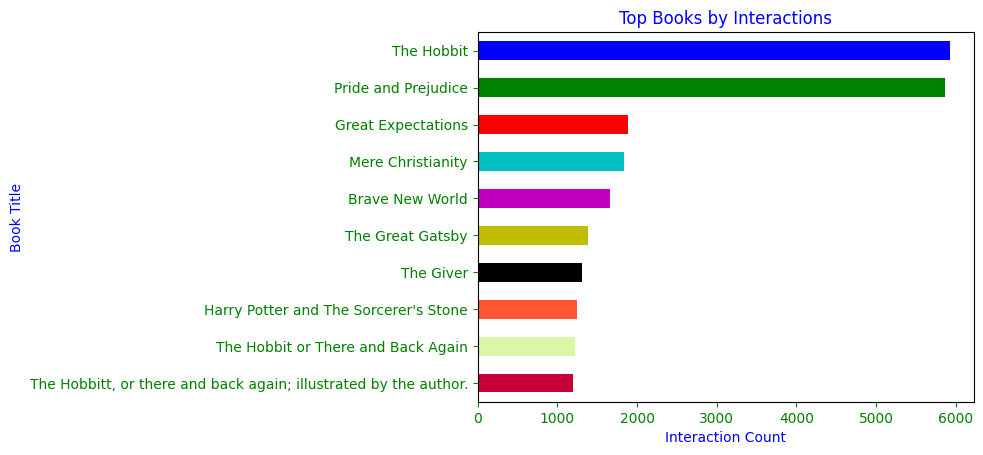

In [ ]:
import matplotlib.pyplot as plt

# Count the number of interactions per book title
top_books = merged_data_all['Title'].value_counts().head(10)

# Plot
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FF5733', '#DAF7A6', '#C70039']
top_books.plot(kind='barh', color=colors)
plt.title('Top Books by Interactions', color='blue')
plt.xlabel('Interaction Count', color='blue')
plt.ylabel('Book Title', color='blue')
plt.gca().invert_yaxis()  # Invert y-axis to have the book with the highest count at the top

# Change the color of the tick labels
plt.tick_params(colors='green')

plt.show()

# Working with year

In [ ]:
def extract_year(date):
    date = str(date)
    if '-' in date:
        date = date.split('-')[0]
    # Remove '*' and '?' from the end of the date
    date = date.rstrip('*?')
    return date

merged_data_all['year'] = merged_data_all['publishedDate'].apply(extract_year)

In [ ]:
merged_data_all['year'].value_counts(ascending = False)

year
2012    36833
2009    31651
2010    29841
2005    28995
2011    26455
        ...  
1838        1
1665        1
1819        1
1828        1
1732        1
Name: count, Length: 192, dtype: int64

In [ ]:
'''
import numpy as np

# Replace 'nan' with numpy.nan
books_data['year'] = books_data['year'].replace('nan', 111).replace('?', '')


# Convert 'Year' to integer
books_data['year'] = books_data['year'].astype(int)
'''

In [ ]:
merged_data_all.head()

,Title,description,publishedDate,categories,Book_id,User_id,Rate,year
0,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,2005-01-01,['Biography & Autobiography'],0826414346,A2F6NONFUDB6UK,4.0,2005
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,2005-01-01,['Biography & Autobiography'],0826414346,A3VA4XFS5WNJO3,4.0,2005
2,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,2005-01-01,['Biography & Autobiography'],0826414346,A30TK6U7DNS82R,5.0,2005
3,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,2000,['Religion'],0829814000,AGKGOH65VTRR4,5.0,2000
4,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,2000,['Religion'],0829814000,A373VVEU6Z9M0N,5.0,2000


In [ ]:
merged_data_all = merged_data_all.drop('publishedDate', axis = 1)

In [ ]:
merged_data_all.isnull().sum()

Title          0
description    0
categories     0
Book_id        0
User_id        0
Rate           0
year           0
dtype: int64

In [ ]:
merged_data_all.head()

,Title,description,categories,Book_id,User_id,Rate,year
0,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Biography & Autobiography'],0826414346,A2F6NONFUDB6UK,4.0,2005
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Biography & Autobiography'],0826414346,A3VA4XFS5WNJO3,4.0,2005
2,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Biography & Autobiography'],0826414346,A30TK6U7DNS82R,5.0,2005
3,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['Religion'],0829814000,AGKGOH65VTRR4,5.0,2000
4,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['Religion'],0829814000,A373VVEU6Z9M0N,5.0,2000


In [ ]:
merged_data_all.to_csv('merged_data_all.csv', index=False)

### Work with Date from 2000

In [ ]:
# Create a new DataFrame that only includes rows where the year is greater than 2000
merged_data_all['year'] = merged_data_all['year'].astype(int)
date_from_2000 = merged_data_all[merged_data_all['year'] >= 2000]
date_from_2000.shape

(466540, 7)

In [ ]:
print (f'With books from 2000 onwards we have {date_from_2000.shape[0]} rows')

With books from 2000 onwards we have 466540 rows


In [ ]:
#date_from_2000.to_csv('date_from_2000.csv', index=False)

In [ ]:
'''
# Convert 'Year' to integer
merged_data_all['Year'] = merged_data_all['Year'].astype(int)
merged_data_final = merged_data_all.copy()

# Save the DataFrame to a CSV file
merged_data_final.to_csv('merged_data_final.csv', index=False)
'''

### Working with date from 2010


In [ ]:
date_from_2010 = merged_data_all[merged_data_all['year'] >= 2010]
date_from_2010.shape

(232249, 7)

In [ ]:
date_rows_10 = date_from_2010.shape[0]
print (f'With books from 2010 onwards we have {date_rows_10} rows')

With books from 2010 onwards we have 232249 rows


In [ ]:
#date_from_2010.to_csv('date_from_2010.csv', index=False)

### Top 20 years

In [ ]:
top_20_years = merged_data_all['year'].value_counts().head(20).index
top_20_df = merged_data_all[merged_data_all['year'].isin(top_20_years)]
top_20_df.shape

(448526, 7)

In [ ]:
print (f'With top 20 years we have {top_20_df.shape[0]} rows')

With top 20 years we have 448526 rows


In [ ]:
#top_20_df.to_csv('Top_20_years.csv', index = False)

Top 10 years

In [ ]:
top_10_years = merged_data_all['year'].value_counts().head(10).index
top_10_df = merged_data_all[merged_data_all['year'].isin(top_10_years)]

In [ ]:
print (f'With top 10 most frequent publication years we have {top_10_df.shape[0]} rows')

With top 10 most frequent publication years we have 272701 rows


In [ ]:
#top_10_df.to_csv('top_10_years.csv', index = False)

# Collaborative Filtering-Carola Recommendation System


In [ ]:
#Singular Value Decomposition (SVD) Method

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = '/content/drive/My Drive/Amazon_Books/merged_data_final.csv'
df = pd.read_csv(file_path)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Title,Description,Authors,Categories,Year,User_id,Rate
0,The Facts of Life: and Other Dirty Jokes,"If you had to give America a voice, it’s been ...",['Willie Nelson'],['Biography & Autobiography'],2009,A3D2Q0BV9ASG47,3.0
1,The Facts of Life: and Other Dirty Jokes,"If you had to give America a voice, it’s been ...",['Willie Nelson'],['Biography & Autobiography'],2009,A328KTKSWCPTFL,2.0
2,The Facts of Life: and Other Dirty Jokes,"If you had to give America a voice, it’s been ...",['Willie Nelson'],['Biography & Autobiography'],2009,AT9S7SF6PXZVE,1.0
3,The Facts of Life: and Other Dirty Jokes,"If you had to give America a voice, it’s been ...",['Willie Nelson'],['Biography & Autobiography'],2009,A1AEP70Z1KP6QM,5.0
4,The Facts of Life: and Other Dirty Jokes,"If you had to give America a voice, it’s been ...",['Willie Nelson'],['Biography & Autobiography'],2009,A2QGZED0U0WTNY,5.0


In [ ]:
df.isnull().sum()
df.dropna(inplace=True)
df['Year'] = df['Year'].astype(int)
df.head()

,Title,Description,Authors,Categories,Year,User_id,Rate
0,The Facts of Life: and Other Dirty Jokes,"If you had to give America a voice, it’s been ...",['Willie Nelson'],['Biography & Autobiography'],2009,A3D2Q0BV9ASG47,3.0
1,The Facts of Life: and Other Dirty Jokes,"If you had to give America a voice, it’s been ...",['Willie Nelson'],['Biography & Autobiography'],2009,A328KTKSWCPTFL,2.0
2,The Facts of Life: and Other Dirty Jokes,"If you had to give America a voice, it’s been ...",['Willie Nelson'],['Biography & Autobiography'],2009,AT9S7SF6PXZVE,1.0
3,The Facts of Life: and Other Dirty Jokes,"If you had to give America a voice, it’s been ...",['Willie Nelson'],['Biography & Autobiography'],2009,A1AEP70Z1KP6QM,5.0
4,The Facts of Life: and Other Dirty Jokes,"If you had to give America a voice, it’s been ...",['Willie Nelson'],['Biography & Autobiography'],2009,A2QGZED0U0WTNY,5.0


In [ ]:
df ['Rate'].describe()

count    9172.000000
mean        4.247710
std         1.190007
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Rate, dtype: float64

In [ ]:

!pip install scikit-surprise

from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split, GridSearchCV, cross_validate
from surprise import accuracy


reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['User_id', 'Title', 'Rate']], reader)

trainset, testset = train_test_split(data, test_size=0.25, random_state=42)
algo = SVD()
algo = SVD(lr_all=0.002, n_epochs=20,biased=True)
algo.fit(trainset)

param_grid = {
    'n_factors': [50, 100, 150],     # Number of latent factors
    'lr_all': [0.002, 0.005, 0.01],  # Learning rate
    'n_epochs': [20, 30, 50],        # Number of epochs
    'reg_all': [0.02, 0.1, 0.2],     # Regularization term
    'biased': [True, False]          # Include user and item biases
}


gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(data)

print("Best RMSE score:", gs.best_score['rmse'])
print("Best hyperparameters:", gs.best_params['rmse'])

best_algo = gs.best_estimator['rmse']
best_algo.fit(trainset)

predictions = best_algo.test(testset)

rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")

In [ ]:
all_titles = df['Title'].unique()

user_id = 'specific_user_id'
rated_titles = df[df['User_id'] == user_id]['Title'].unique()

unrated_titles = [title for title in all_titles if title not in rated_titles]

predictions = [algo.predict(user_id, title) for title in unrated_titles]

predictions.sort(key=lambda x: x.est, reverse=True)

top_10_recommendations = predictions[:10]

for pred in top_10_recommendations:
    print(f"Title: {pred.iid}, Predicted Rating: {pred.est}")

Title: Charlotte's Web, Predicted Rating: 4.828402864465547
Title: With the Old Breed: At Peleliu and Okinawa, Predicted Rating: 4.797188313507129
Title: My Family and Other Animals, Predicted Rating: 4.6466591516033375
Title: The Rise and Fall of the Third Reich, Predicted Rating: 4.5909725783816375
Title: Narrative of the Life of Frederick Douglass, Predicted Rating: 4.590145771022261
Title: Nicholas and Alexandra, Predicted Rating: 4.58843942745232
Title: The Naked Sun, Predicted Rating: 4.541054980151303
Title: Master of the Senate: the Years of LBJ, Vol. III, Predicted Rating: 4.530695394456409
Title: German Boy : A Child in War, Predicted Rating: 4.5202051337008715
Title: Buffett: The Making of an American Capitalist, Predicted Rating: 4.506591480763306


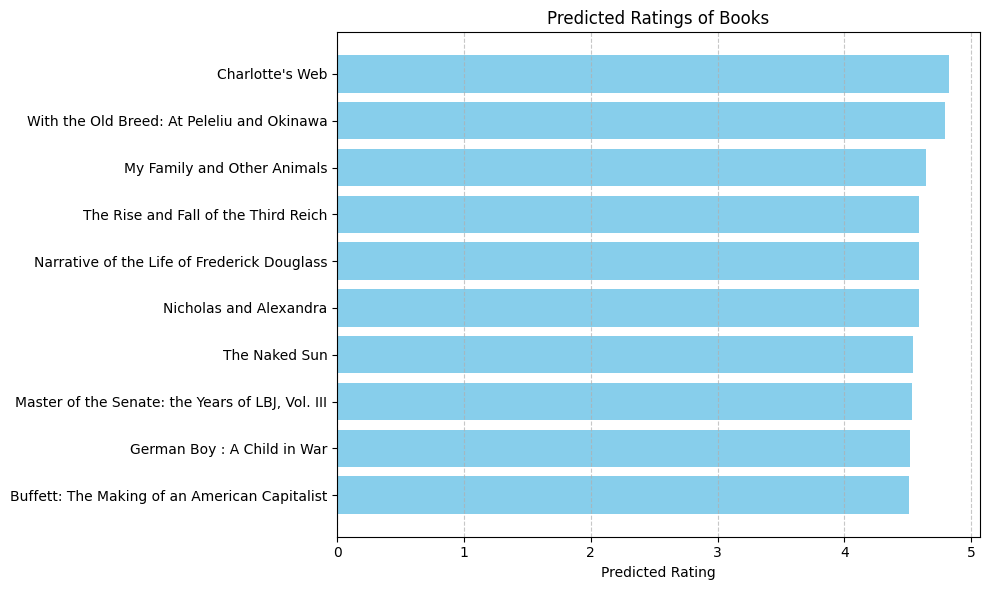

In [ ]:
import matplotlib.pyplot as plt

# Data
titles = [
    "Charlotte's Web",
    "With the Old Breed: At Peleliu and Okinawa",
    "My Family and Other Animals",
    "The Rise and Fall of the Third Reich",
    "Narrative of the Life of Frederick Douglass",
    "Nicholas and Alexandra",
    "The Naked Sun",
    "Master of the Senate: the Years of LBJ, Vol. III",
    "German Boy : A Child in War",
    "Buffett: The Making of an American Capitalist"
]

predicted_ratings = [
    4.828402864465547,
    4.797188313507129,
    4.6466591516033375,
    4.5909725783816375,
    4.590145771022261,
    4.58843942745232,
    4.541054980151303,
    4.530695394456409,
    4.5202051337008715,
    4.506591480763306
]

# Create bar graph
plt.figure(figsize=(10, 6))
plt.barh(titles, predicted_ratings, color='skyblue')
plt.xlabel('Predicted Rating')
plt.title('Predicted Ratings of Books')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rating on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
#User Based K-Nearest Neighbors (KNN) based Collaborative Filtering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = '/content/drive/My Drive/Amazon_Books/merged_data_final.csv'
df = pd.read_csv(file_path)
df.head()

Mounted at /content/drive


,Title,Description,Authors,Categories,Year,User_id,Rate
0,The Facts of Life: and Other Dirty Jokes,"If you had to give America a voice, it’s been ...",['Willie Nelson'],['Biography & Autobiography'],2009,A3D2Q0BV9ASG47,3.0
1,The Facts of Life: and Other Dirty Jokes,"If you had to give America a voice, it’s been ...",['Willie Nelson'],['Biography & Autobiography'],2009,A328KTKSWCPTFL,2.0
2,The Facts of Life: and Other Dirty Jokes,"If you had to give America a voice, it’s been ...",['Willie Nelson'],['Biography & Autobiography'],2009,AT9S7SF6PXZVE,1.0
3,The Facts of Life: and Other Dirty Jokes,"If you had to give America a voice, it’s been ...",['Willie Nelson'],['Biography & Autobiography'],2009,A1AEP70Z1KP6QM,5.0
4,The Facts of Life: and Other Dirty Jokes,"If you had to give America a voice, it’s been ...",['Willie Nelson'],['Biography & Autobiography'],2009,A2QGZED0U0WTNY,5.0


In [ ]:
!pip install scikit-surprise

import pandas as pd
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split, GridSearchCV
from surprise import accuracy

reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(df[['User_id', 'Title', 'Rate']], reader)

trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

param_grid = {
    'k': [10, 20, 30, 40, 50],
    'min_k': [1, 3, 5],
    'sim_options': {
        'name': ['cosine', 'pearson'],
        'user_based': [True, False]
    }
}

gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)
gs.fit(data)

print("Best RMSE score:", gs.best_score['rmse'])
print("Best hyperparameters:", gs.best_params['rmse'])

best_algo = gs.best_estimator['rmse']
best_algo.fit(trainset)

predictions = best_algo.test(testset)
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")

all_titles = df['Title'].unique()
user_id = 'specific_user_id'
rated_titles = df[df['User_id'] == user_id]['Title'].unique()
unrated_titles = [title for title in all_titles if title not in rated_titles]
predictions = [best_algo.predict(user_id, title) for title in unrated_titles]
predictions.sort(key=lambda x: x.est, reverse=True)
top_10_recommendations = predictions[:10]

for pred in top_10_recommendations:
    print(f"Title: {pred.iid}, Predicted Rating: {pred.est}")

In [ ]:
#NMF (Non-negative Matrix Factorization) Collaborative Filtering

In [ ]:
import pandas as pd
from surprise import Dataset, Reader, NMF
from surprise.model_selection import train_test_split, GridSearchCV
from surprise import accuracy


reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(df[['User_id', 'Title', 'Rate']], reader)

trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

param_grid = {
    'n_factors': [10, 15, 20],
    'n_epochs': [20, 30],
    'reg_pu': [0.06, 0.1],
    'reg_qi': [0.06, 0.1],
}

gs = GridSearchCV(NMF, param_grid, measures=['rmse'], cv=3, n_jobs=-1)
gs.fit(data)

print("Best RMSE score:", gs.best_score['rmse'])
print("Best hyperparameters:", gs.best_params['rmse'])

best_algo = gs.best_estimator['rmse']
best_algo.fit(trainset)

predictions = best_algo.test(testset)
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")

user_id = 'specific_user_id'
all_titles = df['Title'].unique()
rated_titles = df[df['User_id'] == user_id]['Title'].unique()
unrated_titles = [title for title in all_titles if title not in rated_titles]
predictions = [best_algo.predict(user_id, title) for title in unrated_titles]
predictions.sort(key=lambda x: x.est, reverse=True)
top_10_recommendations = predictions[:10]

for pred in top_10_recommendations:
    print(f"Title: {pred.iid}, Predicted Rating: {pred.est}")


Best RMSE score: 1.2022756752801496
Best hyperparameters: {'n_factors': 20, 'n_epochs': 20, 'reg_pu': 0.06, 'reg_qi': 0.06}
RMSE: 1.2070
RMSE: 1.20696521292123
Title: The Facts of Life: and Other Dirty Jokes, Predicted Rating: 4.255124291321413
Title: Elizabeth I, Predicted Rating: 4.255124291321413
Title: Lucy: The Real Life of Lucille Ball, Predicted Rating: 4.255124291321413
Title: Morning Glory: A Biography of Mary Lou Williams, Predicted Rating: 4.255124291321413
Title: Holy Bible Liberty Family Heritage Edition [The Jerry Falwell Bible], Predicted Rating: 4.255124291321413
Title: Eternal Improv: A Memoir, Predicted Rating: 4.255124291321413
Title: I was a German;: The autobiography of Ernst Toller, Predicted Rating: 4.255124291321413
Title: Walking tall, Predicted Rating: 4.255124291321413
Title: The Choice, Predicted Rating: 4.255124291321413
Title: Ivan the Terrible, Predicted Rating: 4.255124291321413


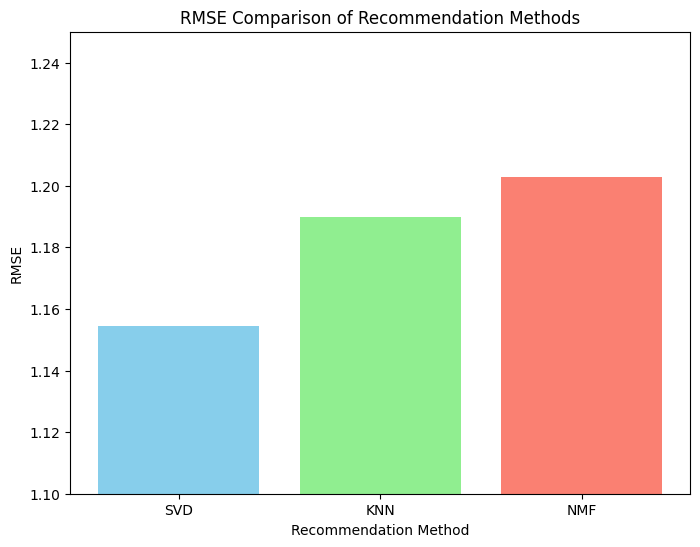

In [ ]:
import matplotlib.pyplot as plt

# RMSE values for each recommendation method
methods = ['SVD', 'KNN', 'NMF']
rmse_values = [1.154374963048218, 1.1897775354497524, 1.2027087133166314]

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(methods, rmse_values, color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Recommendation Method')
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Recommendation Methods')
plt.ylim(1.1, 1.25)  # Set y-axis limits for better visualization
plt.show()

In [ ]:
#Pick specific books and compare content based vs collaborative based RS for specific user.

# Popularity Based